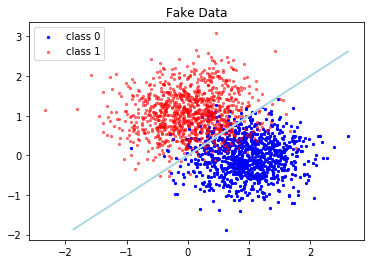

In [77]:
# Before we begin, we need a way to generate the data.
import numpy as np
import matplotlib.pyplot as plt

# We will pick 5 values centered from [0,1] and 5 values centered from [1,0].
# these will be centers of gaussian values of two classes of data.
N=10
x1,y1 = np.random.multivariate_normal(mean=[0,1], cov = [[0.1, 0], [0, 0.1]], size=N).T
x2,y2 = np.random.multivariate_normal(mean=[1,0], cov = [[0.1, 0], [0, 0.1]], size=N).T

# generate_data will generate data for you.  It will return two matrices, 
#  one for class 0 and another for class 1.  It will also return two vectors: one 
#  for each of the labels.
def generate_data(N):
    x_0 = np.array([np.random.multivariate_normal(mean=[a,b], cov = [[0.2, 0], [0, 0.2]], size=N) for (a,b) in zip(x2,y2)]).reshape(-1, 2)
    x_1 = np.array([np.random.multivariate_normal(mean=[a,b], cov = [[0.2, 0], [0, 0.2]], size=N) for (a,b) in zip(x1,y1)]).reshape(-1, 2)
    return x_0, x_1, [0]*x_0.shape[0], [1]*x_1.shape[0]

N = 100
a0,a1,b0,b1 = generate_data(N)

# lets plot the data
plt.title('Fake Data')
#plot the generated data
plt.scatter(a0[:,0], a0[:,1], alpha=1, color='b', s=5, label = 'class 0')
plt.scatter(a1[:,0], a1[:,1], alpha=0.5, color='r', s=5, label = 'class 1')
plt.legend()
# plot the "ideal" decision boundary (corresponding to the generation method)
plt.plot(a0, a0, c='lightblue')
plt.show()

# our training data is a combination of a0 and a1, together with the class targets b0 and b1
x_train = np.concatenate((a0,a1), axis=0)
y_train = np.concatenate((b0,b1), axis=0)

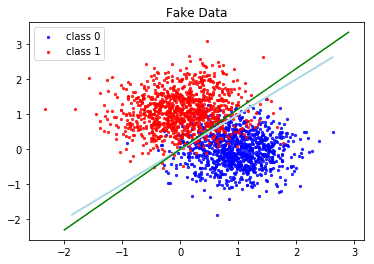

In [80]:
y_pla = y_train.copy()
y_pla[y_pla == 0] =- 1

def E_in(w, x, y):
    return np.sum(np.abs(np.sign(np.sum(np.multiply(x, w), axis = 1)) - y_pla))
    
def point(w, x, y):
    a = np.sign(np.sum(np.multiply(x, w), axis = 1)) - y_pla
    i = np.where(a != 0)[0][[0]]
    return x[i], y[i]

def calc_w(w, x, y):
    if E_in(w, x, y) > 0:
        x_1, y_1 = point(w, x, y)
        w = w + x_1 * y_1
    return w

def pocket(x, y, N):
    w = np.matrix([1, 1])
    w_1 = np.random.uniform(0.0, 1.0, 2)
    for t in range(N):
        w_1 = calc_w(w_1, x, y)
        if E_in(w_1, x, y) < E_in(w, x, y):
            w = w_1
    return w

w = pocket(x_train, y_pla, 1000)

plt.title("Fake Data")
plt.scatter(a0[:, 0], a0[:, 1], alpha = 0.8, color = 'b', s = 5, label = 'class 0')
plt.scatter(a1[:, 0], a1[:, 1], alpha = 0.8, color = 'r', s = 5, label = 'class 1')
plt.legend()

plt.plot(a0, a0, c = 'lightblue')

func = lambda x_i: -(w[0, 0] * x_i) / w[0, 1]

x_values = np.array([x for x in np.arange(-2, 3, 0.1)])
plt.plot(x_values, func(x_values), c = 'g')

plt.show()

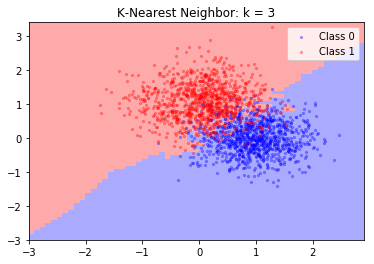

In [81]:
def euclidean(p1, p2):
    dist = p1 - p2
    return np.sqrt(dist.dot(dist))

def distance_array(pt, x):
    return np.apply_along_axis(lambda z: euclidean(pt, z), 1, x)

def knn(k, pt, x, y):
    ix = np.argsort(distance_array(pt, x))
    y_1 = sum(y[ix][:k])
    if y_1 > k - y_1:
        return 1
    return 0

def predict(k, pts, x, y):
    return np.apply_along_axis(lambda p: knn(k, p, x, y), 1, pts)

from matplotlib.colors import ListedColormap

N = 100
a0, a1, b0, b1 = generate_data(N)
x_train = np.concatenate((a0, a1), axis = 0)
y_train = np.concatenate((b0, b1), axis = 0)

k = 3

x_min, x_max = -3, 3
y_min, y_max = -3, 3.5
h = .1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = predict(k, np.c_[xx.ravel(), yy.ravel()], x_train, y_train)
Z = Z.reshape(xx.shape)

map_color = ListedColormap(['#AAAAFF', '#FFAAAA'])
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = map_color)
plt.scatter(a0[:, 0], a0[:, 1], alpha = 0.3, color = 'b', s = 5, label = 'Class 0')
plt.scatter(a1[:, 0], a1[:, 1], alpha = 0.3, color = 'r', s = 5, label = 'Class 1')
plt.legend()
plt.title("K-Nearest Neighbor: k = {}".format(k))
plt.show()

In [88]:
# Calculate MSE for PLA and KNN
g_pla = lambda x: np.sign(np.sum(np.multiply(w, x)))
g_knn = lambda x: predict(3, x, x_train, y_train)
def MSE (g, x, y):
    return (1 / x.shape[0]) * np.sum((g(x) - y) ** 2)

PLA and KNN MSE for the training set:

In [89]:
print(MSE(g_pla, x_train, y_pla))
print(MSE(g_knn, x_train, y_train))

2.0
0.0535


PLA and KNN MSE for the test set:

In [90]:
print(MSE(g_pla, new_x, new_y_pla))
print(MSE(g_knn, new_x, new_y))

1.8364640883977903
0.10359116022099449
